# MSBA 605-77 - Python for Analytics
## Program 5
__Name__: ADD HERE (double click the cell in Jupyter to edit)<br>
__Due__: Sunday, November 5 (by 11:59 PM)<br />
__Worth__: 100 pts.<br />
__Purpose__: Perform a basic exploratory data analysis of a data set including visualizations.

Add your code to the cells below. When finished, be sure to save your notebook, then _Close and Shutdown Notebook_ from the _File_ menu. Return to Blackboard and upload your completed Notebook file (`Prog5.ipynb`).

### Directions
In the code cells below, write Python code to accomplish the following [Exploratory Data Analysis](https://www.ibm.com/topics/exploratory-data-analysis) steps on the given dataset. The linked post from IBM explains:

> "Exploratory data analysis (EDA) is used by data scientists to analyze and investigate data sets and summarize their main characteristics, often employing data visualization methods. It helps determine how best to manipulate data sources to get the answers you need, making it easier for data scientists to discover patterns, spot anomalies, test a hypothesis, or check assumptions.
>
> "EDA is primarily used to see what data can reveal beyond the formal modeling or hypothesis testing task and provides a provides a better understanding of data set variables and the relationships between them. It can also help determine if the statistical techniques you are considering for data analysis are appropriate. Originally developed by American mathematician John Tukey in the 1970s, EDA techniques continue to be a widely used method in the data discovery process today."

We'll primarily use a combination of NumPy, pandas, matplotlib, and seaborn in the cells below to perform our EDA on a [Kaggle dataset](https://www.kaggle.com/datasets/CooperUnion/cardataset/) containing attributes about cars and their associated sales price. At the end, we'll perform a linear regression using one of the variables to see how useful it is for predicting sales price.

The provided file `P5-CarData.csv` contains the car data from Kaggle just in a renamed file made available for you in Blackboard. Complete the following steps in the code cells that follow each prompt.

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline  
filename = 'P5-CarData.csv'

1. Use pandas `.read_csv` function to read the `P5-CarData.csv` file into a `DataFrame` as described in [Section 6.1 Reading and Writing Data in Text Format](https://wesmckinney.com/book/accessing-data#io_flat_files). Be sure that you save the data file in the same folder as your Notebook. This way, you can simply use the filename without additional path information when reading the file. Evaluate the DataFrame to see the data that you working with.

In [123]:
# Put Code Here
df = pd.read_csv('P5-CarData.csv')

2. There are almost 12,000 rows and 16 columns of data in this file. Use the DataFrame method `.info()` to learn more details about the columns in your dataset.

In [124]:
# Put Code Here
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

3. There are some columns here that probably aren't going to prove useful for our intended analysis, so let's drop them to make our DataFrame more manageable before we proceed. The columns to drop are: `'Engine Fuel Type', 'Market Category', 'Vehicle Style', 'Number of Doors', 'Vehicle Size'`. Here, `'Market Category'` has a lot of missing data, as well, so it may not have been very useful anyway. Evaluate the `.head()` of the DataFrame to see that the columns were dropped.

In [125]:
# Put Code Here
dropped_columns = ['Engine Fuel Type', 'Market Category', 'Vehicle Style', 'Number of Doors', 'Vehicle Size']
df = df.drop(columns=dropped_columns)

print(df.head())

  Make       Model  Year  Engine HP  Engine Cylinders Transmission Type  \
0  BMW  1 Series M  2011      335.0               6.0            MANUAL   
1  BMW    1 Series  2011      300.0               6.0            MANUAL   
2  BMW    1 Series  2011      300.0               6.0            MANUAL   
3  BMW    1 Series  2011      230.0               6.0            MANUAL   
4  BMW    1 Series  2011      230.0               6.0            MANUAL   

      Driven_Wheels  highway MPG  city mpg  Popularity   MSRP  
0  rear wheel drive           26        19        3916  46135  
1  rear wheel drive           28        19        3916  40650  
2  rear wheel drive           28        20        3916  36350  
3  rear wheel drive           28        18        3916  29450  
4  rear wheel drive           28        18        3916  34500  


4. Let's rename some of the columns to make them easier to work with. You can use the DataFrame `.rename` method to change `Engine HP` to
`HP`, `Engine Cylinders` to `Cylinders`, `Transmission Type` to `Transmission`, `highway MPG` to `MPG_H`, and `city mpg` to `MPG_C`.
Evaluate the `.head()` of the DataFrame to see that the column names changed.

In [126]:
# Put Code Here
df = df.rename(columns={
    'Engine HP': 'HP','Engine Cylinders': 'Cylinders','Transmission Type': 'Transmission','highway MPG': 'MPG_H',
    'city mpg': 'MPG_C' })
print(df.head())

  Make       Model  Year     HP  Cylinders Transmission     Driven_Wheels  \
0  BMW  1 Series M  2011  335.0        6.0       MANUAL  rear wheel drive   
1  BMW    1 Series  2011  300.0        6.0       MANUAL  rear wheel drive   
2  BMW    1 Series  2011  300.0        6.0       MANUAL  rear wheel drive   
3  BMW    1 Series  2011  230.0        6.0       MANUAL  rear wheel drive   
4  BMW    1 Series  2011  230.0        6.0       MANUAL  rear wheel drive   

   MPG_H  MPG_C  Popularity   MSRP  
0     26     19        3916  46135  
1     28     19        3916  40650  
2     28     20        3916  36350  
3     28     18        3916  29450  
4     28     18        3916  34500  


5. Let's see if the data includes any duplicate rows that should be removed. Use the DataFrame `.duplicated` method find the duplicate rows.
The method will return a Boolean array with `True` values anywhere the row is a duplicate. Count (or sum) the number of duplicate rows and
print the result.

In [127]:
# Put Code Here
duplicatedRows = df.duplicated()
duplicated_rows = duplicatedRows.sum()

print("Number of duplicated rows:", duplicated_rows)


Number of duplicated rows: 989


6. Now, let's remove those duplicate rows from the DataFrame using the `.drop_duplicates()` method. Use the DataFrame's `shape` attribute to
confirm how many rows and columns now remain.

In [128]:
# Put Code Here
df.drop_duplicates()
num_rows, num_columns = df.shape
print("Number of remaining rows after removing duplicate rows:", num_rows)
print("Number of columns:", num_columns)


Number of remaining rows after removing duplicate rows: 11914
Number of columns: 11


7. Next, let's find any missing data in the columns. Use the DataFrame `isna` and `sum` methods together (as in `.isna().sum()`) to count
how many missing data points exist for each column and print the result.

In [129]:
# Put Code Here
missing_data = df.isna().sum()
print("Missing data in each columns:")
print(missing_data)

Missing data in each columns:
Make              0
Model             0
Year              0
HP               69
Cylinders        30
Transmission      0
Driven_Wheels     0
MPG_H             0
MPG_C             0
Popularity        0
MSRP              0
dtype: int64


8. The choice of what to do about such missing data is an important decision that may affect the quality of the resulting analysis that you
perform. Here, the missing data for `Cylinders` likely reflects that some cars don't have engines with cylinders at all (such as electric vehicles). For this column, replacing the missing data with zeros is appropriate. Use the `.fillna` method of the `DataFrame` to fill those missing values in the `Cylinders` column with zeros as described in [Section 7.1's Filling In Missing Data subsection](https://wesmckinney.com/book/data-cleaning#pandas_missing_filling).

In [130]:
# Put Code Here

missing_data_for_Cylinders = df['Cylinders'] = df['Cylinders'].fillna(0)

print(df.head())

  Make       Model  Year     HP  Cylinders Transmission     Driven_Wheels  \
0  BMW  1 Series M  2011  335.0        6.0       MANUAL  rear wheel drive   
1  BMW    1 Series  2011  300.0        6.0       MANUAL  rear wheel drive   
2  BMW    1 Series  2011  300.0        6.0       MANUAL  rear wheel drive   
3  BMW    1 Series  2011  230.0        6.0       MANUAL  rear wheel drive   
4  BMW    1 Series  2011  230.0        6.0       MANUAL  rear wheel drive   

   MPG_H  MPG_C  Popularity   MSRP  
0     26     19        3916  46135  
1     28     19        3916  40650  
2     28     20        3916  36350  
3     28     18        3916  29450  
4     28     18        3916  34500  


9. For `HP`, however, replacing the missing data with zeros would be a poor decision. Instead, calculate the mean HP and use the `.fillna`
method of the `DataFrame` to fill those missing values in the `HP` column with the mean HP. Repeat the summation of the missing data in the columns to verify that all show zero remaining missing data.

In [131]:
# Put Code Here
For_HPmean = df['HP'].mean()
method_of_dataframe = df['HP'] = df['HP'].fillna(For_HPmean)

print("Missing values for each column:")
print(missing_values)

Missing values for each column:
Make             0
Model            0
Year             0
HP               0
Cylinders        0
Transmission     0
Driven_Wheels    0
MPG_H            0
MPG_C            0
Popularity       0
MSRP             0
dtype: int64


10. Next, let's get a feel for the data using the DataFrame `.describe` method. Use the results to answer the following questions in a comment
in the cell below:
* What is the maximum horsepower (HP) in the dataset?
* What is the minimum city MPG in the dataset?
* What is the maximum highway MPG in the dataset?
* What is the maximum price (MSRP) in the dataset?
* Do any of these values concern you as being potential outliers?

In [132]:
# Put Code Here
the_following_questions = df.describe()
print(the_following_questions)

               Year            HP     Cylinders         MPG_H         MPG_C  \
count  11914.000000  11914.000000  11914.000000  11914.000000  11914.000000   
mean    2010.384338    249.386070      5.614655     26.637485     19.733255   
std        7.579740    108.875192      1.800554      8.863001      8.987798   
min     1990.000000     55.000000      0.000000     12.000000      7.000000   
25%     2007.000000    170.000000      4.000000     22.000000     16.000000   
50%     2015.000000    227.000000      6.000000     26.000000     18.000000   
75%     2016.000000    300.000000      6.000000     30.000000     22.000000   
max     2017.000000   1001.000000     16.000000    354.000000    137.000000   

         Popularity          MSRP  
count  11914.000000  1.191400e+04  
mean    1554.911197  4.059474e+04  
std     1441.855347  6.010910e+04  
min        2.000000  2.000000e+03  
25%      549.000000  2.100000e+04  
50%     1385.000000  2.999500e+04  
75%     2009.000000  4.223125e+04  


11. Next, let's explore the data to find outliers that we may need to remove from the dataset. A good way to identify such outliers is by
    using a boxplot as described in the [seaborn documentation](https://seaborn.pydata.org/generated/seaborn.boxplot.html):
    > "A box plot (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates comparisons between
    >  variables or across levels of a categorical variable. The box shows the quartiles of the dataset while the whiskers extend to
    > show the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of
    >  the inter-quartile range."
    
    For more information about quartiles and box plots, see the excellent tutorial from the University of Illinois: [Quartiles and Box Plots](https://discovery.cs.illinois.edu/learn/Exploratory-Data-Analysis/Quartiles-and-Box-Plots/)

    Both pandas and seaborn can be used to create a boxplot. In pandas, you can write:
    
    ```python
    df['ColumnName'].plot.box();
    ```
    <br />In seaborn, you can write:
    
    ```python
    sns.boxplot(x=df['ColumnName']);
    ```
    <br />Use one of these approaches to create a boxplot for each of the following columns: `HP`, `Cylinders`, `MPG_H`, `MPG_C`, and `MSRP`.
    Create each plot in a separate code cell below.

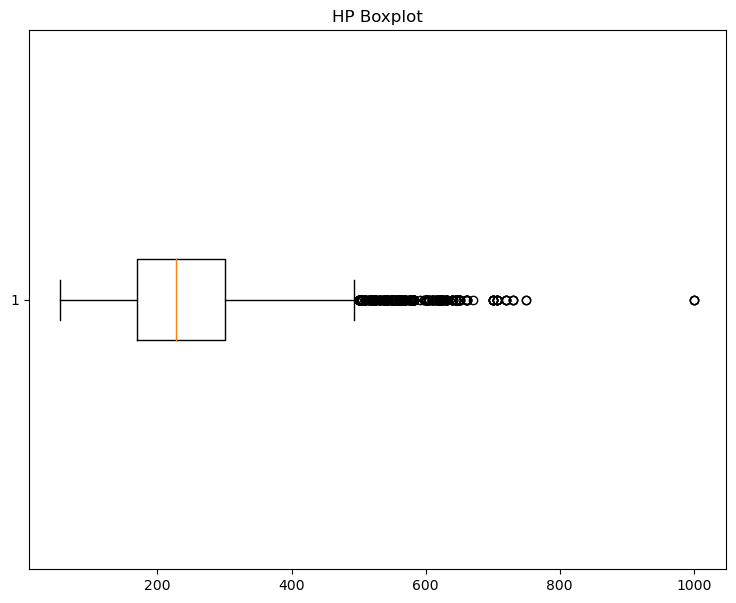

In [133]:
# Put Code Here for HP
plt.figure(figsize=(9, 7))
plt.boxplot(df['HP'], vert=False)
plt.title('HP Boxplot')
plt.show()

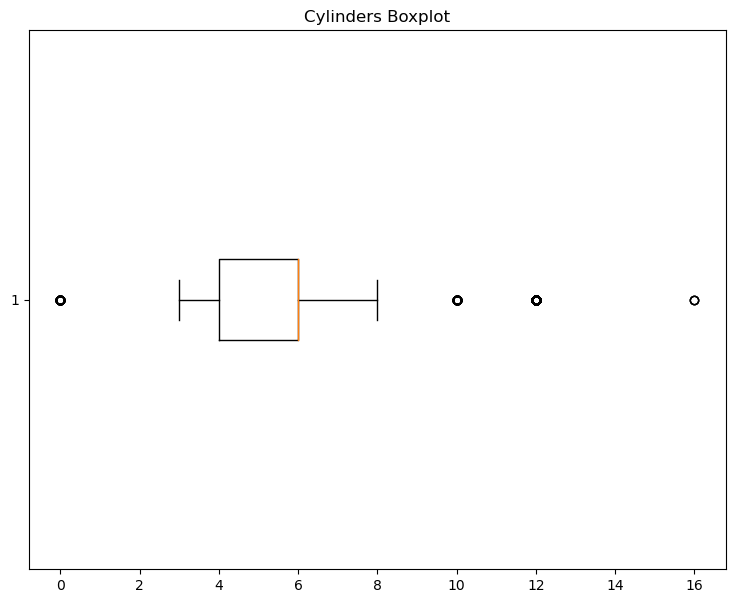

In [134]:
# Put Code Here for Cylinders
plt.figure(figsize=(9, 7))
plt.boxplot(df['Cylinders'], vert=False)
plt.title('Cylinders Boxplot')
plt.show()

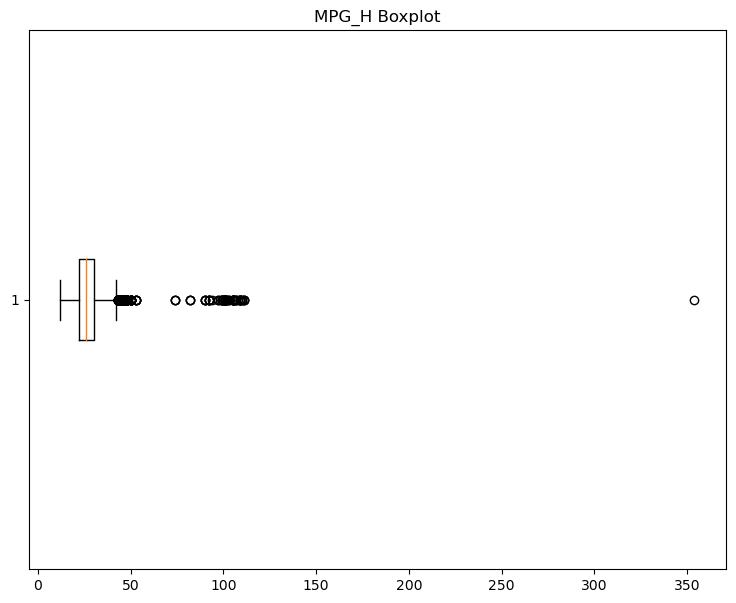

In [135]:
# Put Code Here for MPG_H
plt.figure(figsize=(9, 7))
plt.boxplot(df['MPG_H'], vert=False)
plt.title('MPG_H Boxplot')
plt.show()

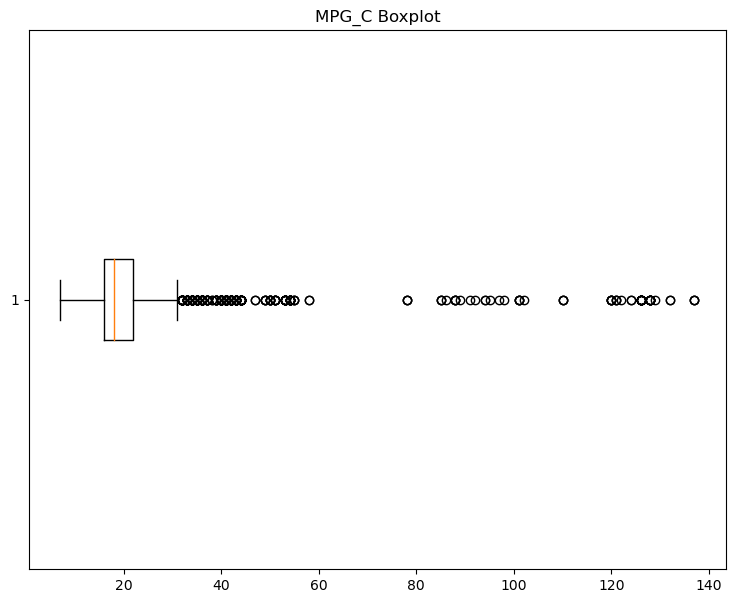

In [136]:
# Put Code Here for MPG_C
plt.figure(figsize=(9, 7))
plt.boxplot(df['MPG_C'], vert=False)
plt.title('MPG_C Boxplot')
plt.show()

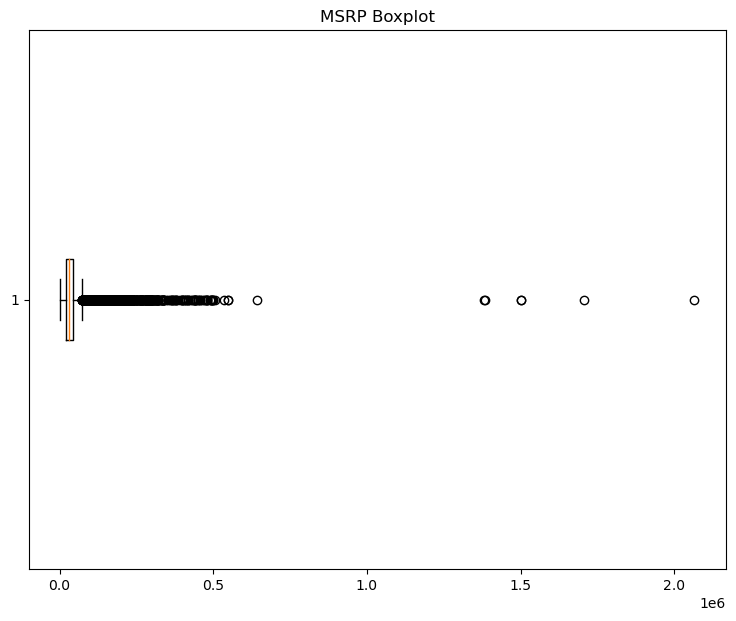

In [138]:
# Put Code Here for MSRP
plt.figure(figsize=(9, 7))
plt.boxplot(df['MSRP'], vert=False)
plt.title('MSRP Boxplot')
plt.show()

12. Let's clean up some of these outliers by removing (dropping) the offending rows from the DataFrame for the outliers in `HP` and `MSRP`.
Where to draw the line between the datapoints we wish to keep and the outliers is an important decision for which your judgment will play
a critical role in determining. A commonly used approach is to drop values that are 1.5 times the inter-quartile range (Q3 - Q1) beyond the first and
third quartiles. When we used `.describe` to summarize the numerical columns, the first and third quartile values were presented as the 25% and 75%
values shown. You can calculate these values directly using the pandas `.quantile` method using `0.25` for Q1 and `0.75` for Q3, as in:
```python
Q1_HP = df['HP'].quantile(0.25)
Q3_HP = df['HP'].quantile(0.75)
IQR_HP = Q3_HP - Q1_HP
```
The outliers will be less than `Q1 - 1.5*IQR` or greater than `Q3 + 1.5*IQR`. Calculate these lower and upper cutoff values for the outliers in
the `HP` and `MSRP` columns and print these results.

In [139]:
# Put Code Here
#quartile and inter-quartile range for 'HP'
Q1_HP = df['HP'].quantile(0.25)
Q3_HP = df['HP'].quantile(0.75)
IQR_HP = Q3_HP - Q1_HP

#'HP' outliers
lower_cutoff_values = Q1_HP - 1.5 * IQR_HP
upper_cutoff_values = Q3_HP + 1.5 * IQR_HP

print("Lower cutoff values for HP outliers:", lower_cutoff_HP)
print("Upper cutoff values for HP outliers:", upper_cutoff_HP)

#quartiles for 'MSRP'
Q1_MSRP = df['MSRP'].quantile(0.25)
Q3_MSRP = df['MSRP'].quantile(0.75)
IQR_MSRP = Q3_MSRP - Q1_MSRP

#'MSRP' outliers
lower_cutoff_values = Q1_MSRP - 1.5 * IQR_MSRP
upper_cutoff_values = Q3_MSRP + 1.5 * IQR_MSRP

print("\nLower cutoff values for MSRP outliers:", lower_cutoff_MSRP)
print("Upper cutoff values for MSRP outliers:", upper_cutoff_MSRP)


Lower cutoff values for HP outliers: -19.5
Upper cutoff values for HP outliers: 496.5

Lower cutoff values for MSRP outliers: -9962.5
Upper cutoff values for MSRP outliers: 75257.5


13. Now that you know the values that define the upper and lower limits for `HP` and `MSRP`, remove all rows from the DataFrame that don't fall
    within these limits for these columns. Any row with an outlier value for `HP` or `MSRP` (or both) should be dropped from the DataFrame.
    Use `.describe` to display the new summary statistics for the DataFrame after these outliers have been removed. Verify that the new min and max
    values for `HP` and `MSRP` are within the limits you identified in the previous step.
    
> __Hint__: You can either drop the outlier rows or keep the rows without outliers. Either approach can work.

In [140]:
# Put Code Here
new_df = df[
    (df['HP'] >= lower_cutoff_HP) & (df['HP'] <= upper_cutoff_HP) &
    (df['MSRP'] >= lower_cutoff_MSRP) & (df['MSRP'] <= upper_cutoff_MSRP)
]

new_statistics = new_df.describe()
print(new_statistics)


               Year            HP     Cylinders         MPG_H         MPG_C  \
count  10913.000000  10913.000000  10913.000000  10913.000000  10913.000000   
mean    2010.100064    227.333069      5.336846     27.100156     20.191515   
std        7.769939     78.571552      1.474234      8.736592      8.910230   
min     1990.000000     55.000000      0.000000     12.000000     10.000000   
25%     2006.000000    169.000000      4.000000     22.000000     16.000000   
50%     2014.000000    210.000000      6.000000     26.000000     19.000000   
75%     2016.000000    285.000000      6.000000     31.000000     22.000000   
max     2017.000000    485.000000     12.000000    354.000000    137.000000   

         Popularity          MSRP  
count  10913.000000  10913.000000  
mean    1565.739577  28688.182351  
std     1455.590340  16006.566181  
min       21.000000   2000.000000  
25%      549.000000  20095.000000  
50%     1385.000000  28460.000000  
75%     2009.000000  38180.000000  


14. Create new boxplots for `HP` and `MSRP` to visualize the difference in the data with the initial outliers removed. Use the other method
    for creating the boxplots (use pandas if you previously used seaborn, use seaborn if you previously used pandas). Create each plot in a
    separate code cell below.

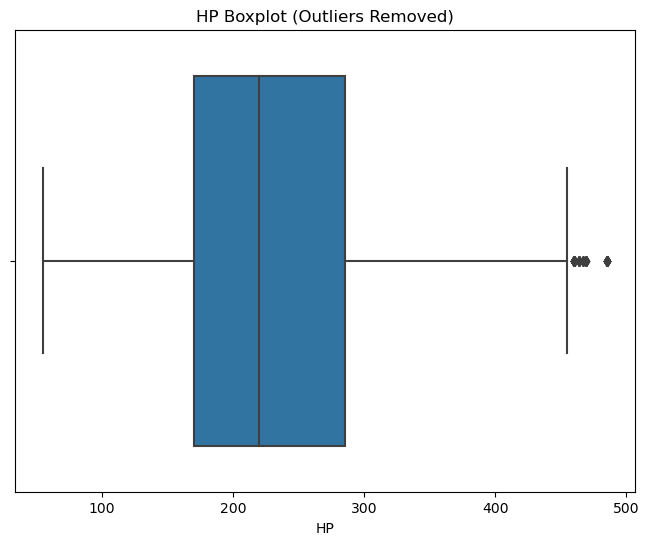

In [141]:
# Put Code Here for HP
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_cleaned, x='HP')
plt.title('HP Boxplot (Outliers Removed)')
plt.show()

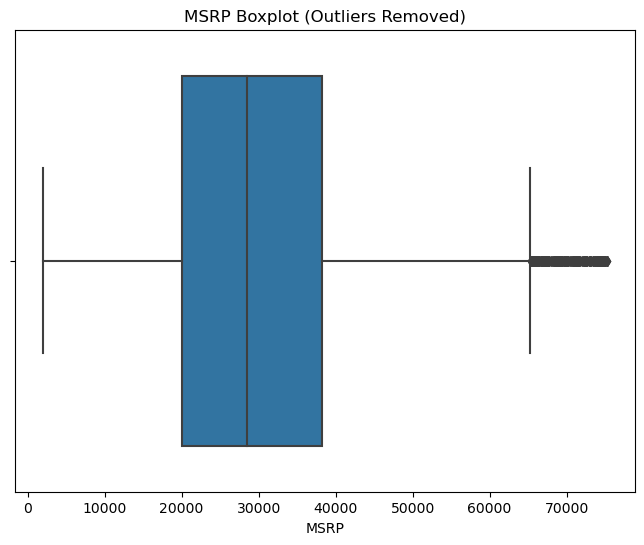

In [142]:
# Put Code Here for MSRP
plt.figure(figsize=(8, 6))
sns.boxplot(data=new_df, x='MSRP')
plt.title('MSRP Boxplot (Outliers Removed)')
plt.show()

15. Create a bar plot that shows the count of each `Make` of car in the DataFrame. Use this plot to find which make of car is the most
    popular in our remaining dataset. An easy way to create the counts of the unique `Make` values is to use the `np.unique` function with the
    DataFrame's `'Make'` column and the `return_counts=True` argument. This will return a tuple with the unique values and associated counts of
    each value respectively which you can then plot. If you use [matplotlib function `barh`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.barh.html),
    you won't have to rotate the ticks.

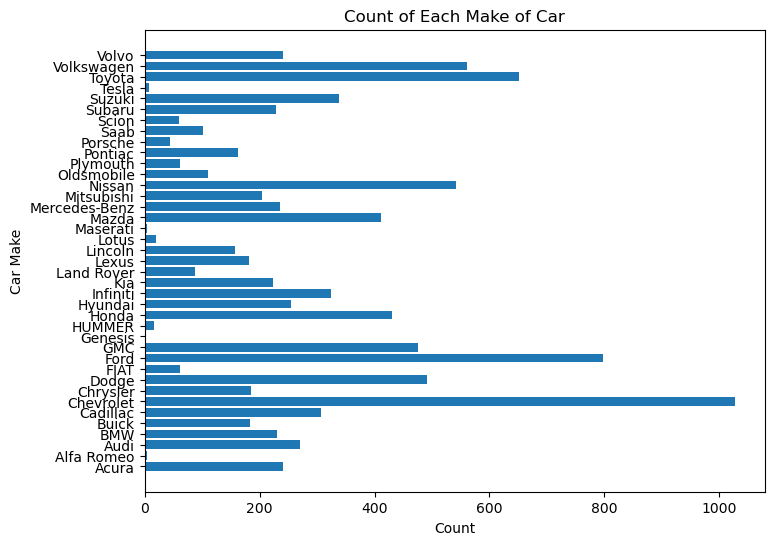

In [143]:
unique_make_values, unique_counts = np.unique(df_cleaned['Make'], return_counts=True)

plt.figure(figsize=(8, 6))
plt.barh(unique_make_values, unique_counts)
plt.title('Count of Each Make of Car')
plt.xlabel('Count')
plt.ylabel('Car Make')
plt.show()


16. Create a histogram that shows the `HP` distribution. Use [seaborn's `histplot` method](https://seaborn.pydata.org/generated/seaborn.histplot.html) to create the histogram. Include the kernel density estimate in the plot by using the `kde=True` argument.

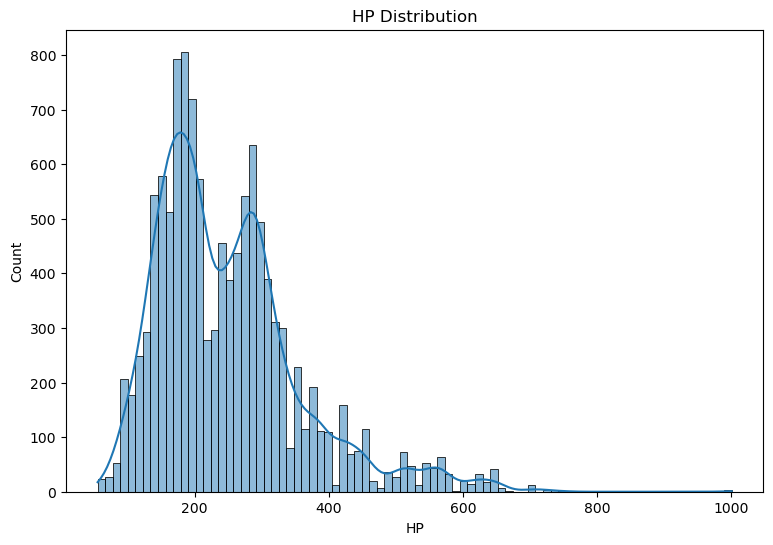

In [144]:
# Put Code Here
plt.figure(figsize=(9, 6))
sns.histplot(data=df, x='HP', kde=True)
plt.title('HP Distribution')
plt.show()

17. Create a histogram that shows the `MSRP` distribution. Use [seaborn's `histplot` method](https://seaborn.pydata.org/generated/seaborn.histplot.html) to create the histogram. Include the kernel density estimate in the plot by using the `kde=True` argument.

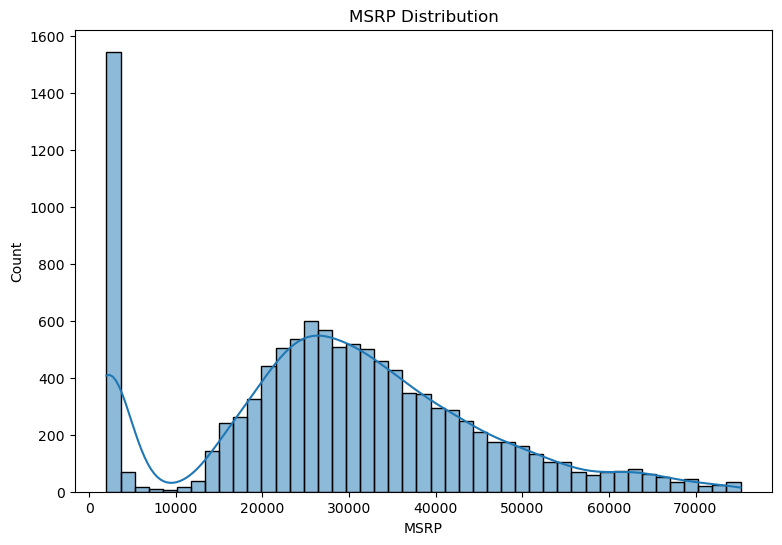

In [145]:
# Put Code Here
df_diagram = df[(df['MSRP'] >= lower_cutoff_MSRP) & (df['MSRP'] <= upper_cutoff_MSRP)]
plt.figure(figsize=(9, 6))
sns.histplot(data=df_diagram, x='MSRP', kde=True)
plt.title('MSRP Distribution')
plt.show()

18. Let's finish by creating a graphical representation of all the relationships between the numeric variables in your DataFrame by using
    seaborn to create a `pairplot` as shown in [Section 9.2](https://wesmckinney.com/book/plotting-and-visualization#vis_pandas_splom).
    Include the kernel density estimate by including the `diag_kind="kde"` argument. Ignore any warning about tight layout. 

/Users/seamlesshr/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


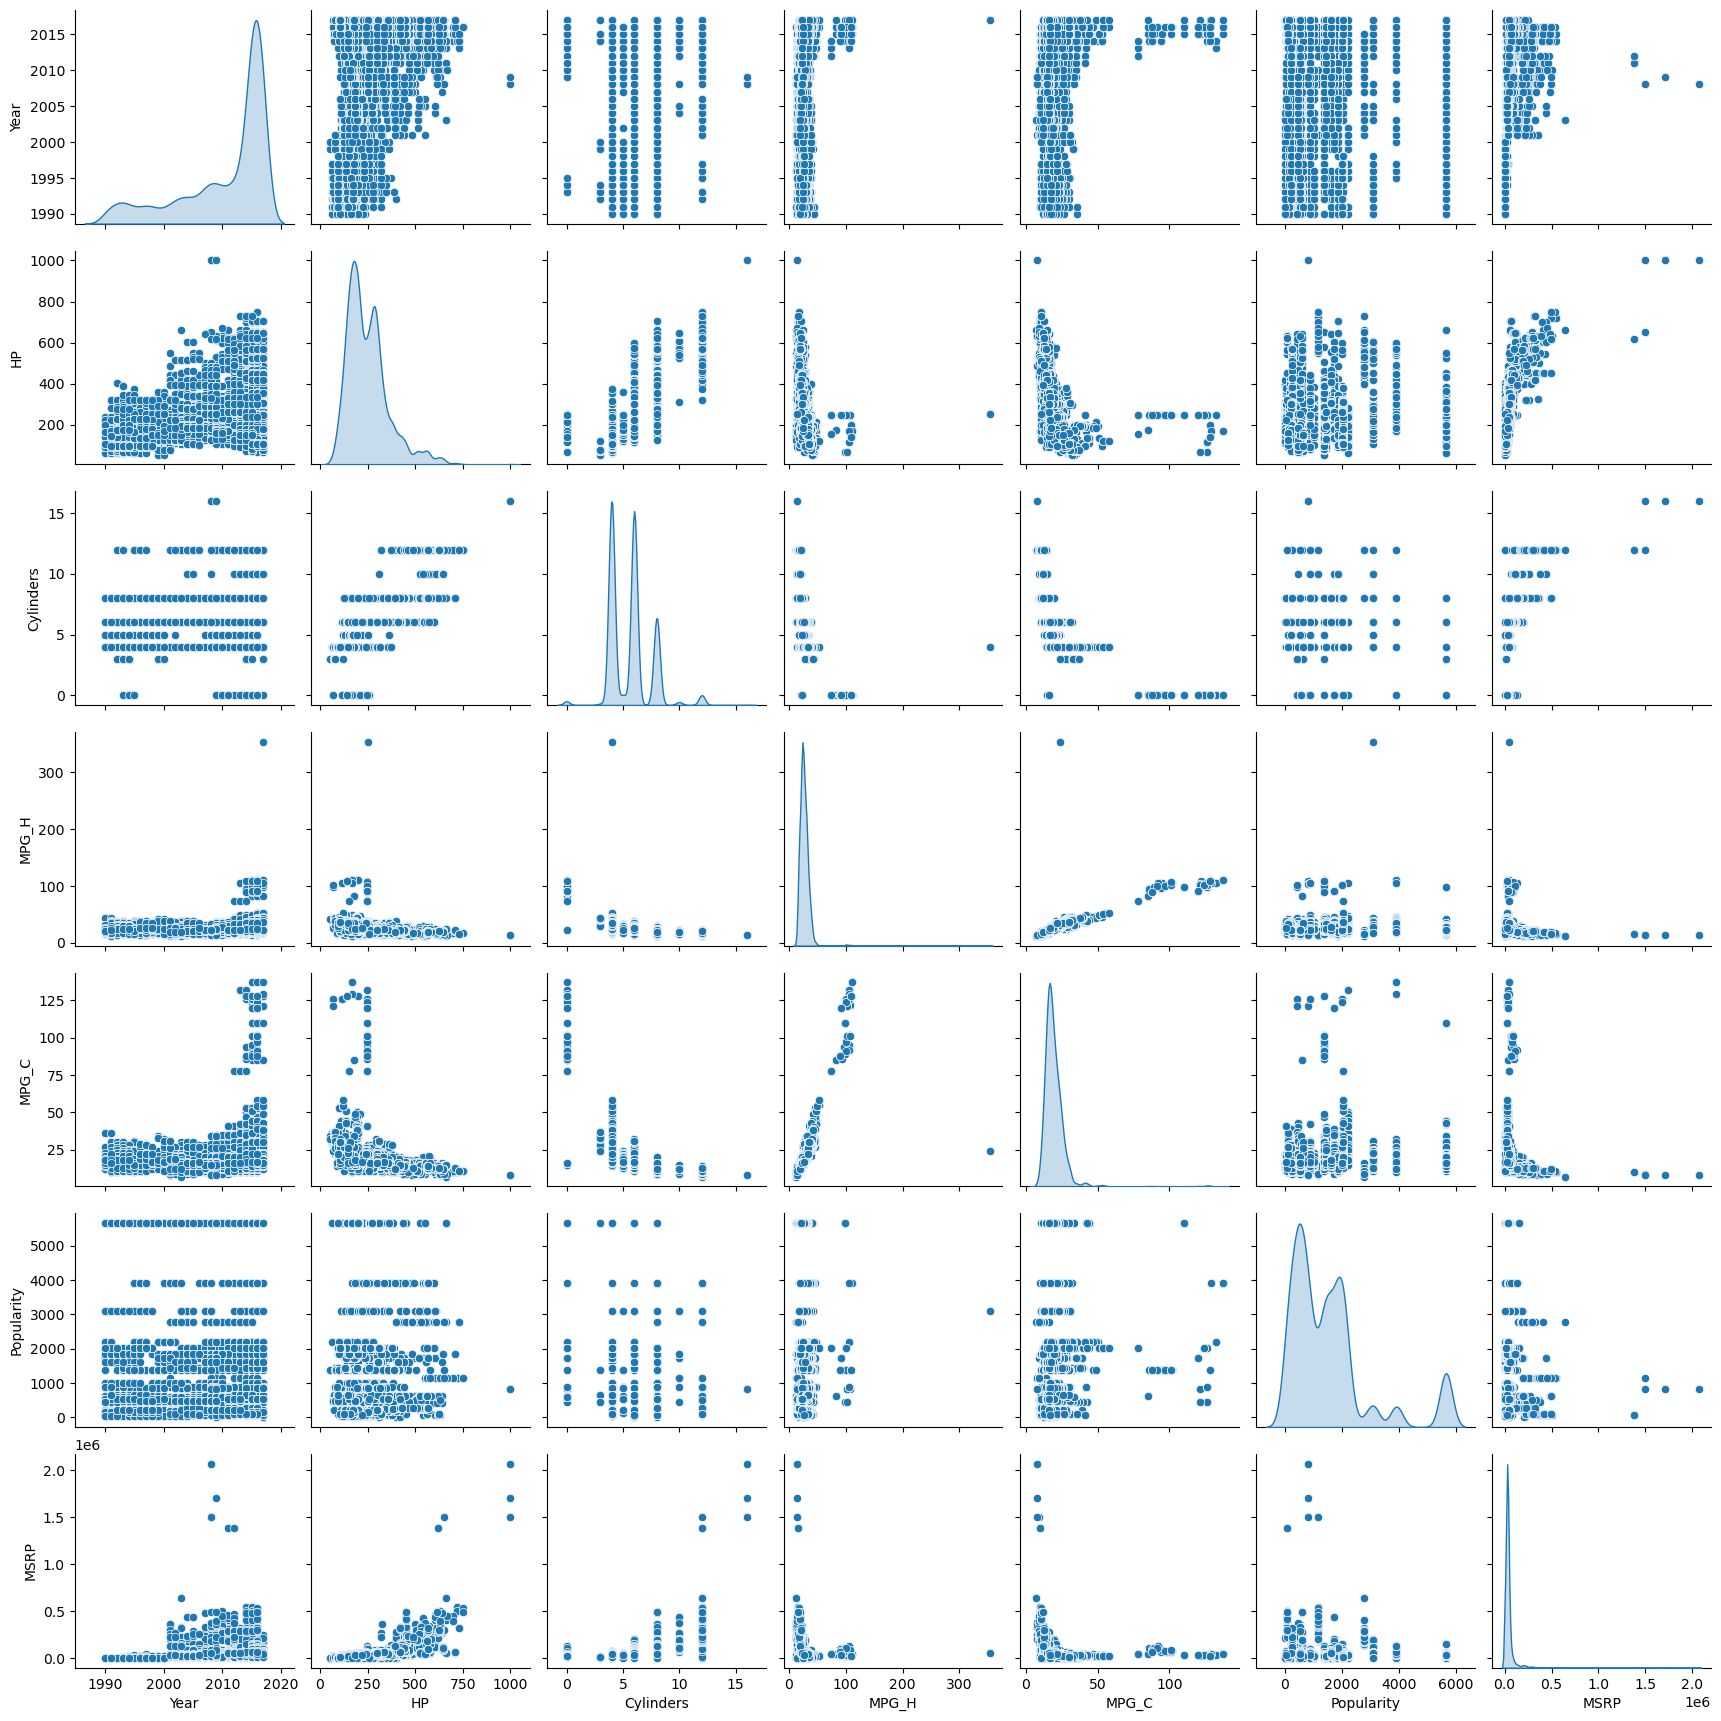

In [149]:
# Put Code Here
sns.pairplot(df, diag_kind="kde")
plt.show()

19. The relationship between `HP` and `MSRP` looks interesting. Let's explore if a linear relationship may exist between between a car's
    `HP` and `MSRP` by using seaborn to create a `regplot` or `lmplot`. As noted in the seaborn [regression tutorial](https://seaborn.pydata.org/tutorial/regression.html), both functions can be used to visualize a linear fit. Both draw a scatterplot of two variables, `x` and `y`, and then fit
    the regression model `y ~ x` and plot the resulting regression line and a 95% confidence interval for that regression. The functions draw
    similar plots, but `regplot` is an _axes-level_ function, and `lmplot` is a _figure-level_ function. Either will work here. Use `HP` as the
    `x` variable and `MSRP` as the `y` variable. Your DataFrame will be the `data` argument.

/Users/seamlesshr/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 900x600 with 0 Axes>

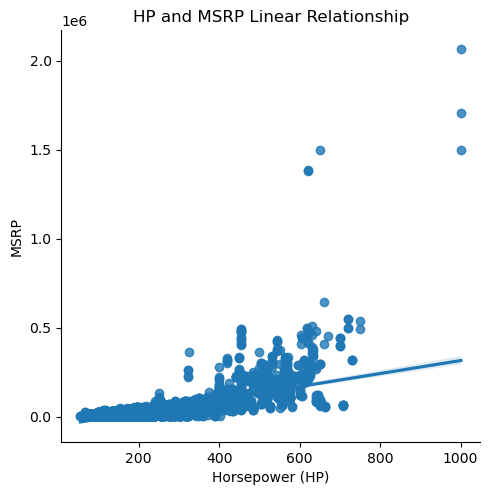

In [159]:
# Put Code Here
plt.figure(figsize=(9, 6))
sns.lmplot(data=df, x='HP', y='MSRP')
plt.xlabel('Horsepower (HP)')
plt.ylabel('MSRP')
plt.title('HP and MSRP Linear Relationship')
plt.show()

20. Let's finish by using SciPy's `stats` module to calculate a simple linear regression using function `linregress` as described in the
    [SciPy documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html#scipy.stats.linregress). Use
    the DataFrame's `HP` column as `x` and the `MSRP` column as `y`. From the resulting model, print the R<sup>2</sup> value. Recreate
    the regression plot using the following approach shown in the `linregress` documentation:
```python
plt.plot(x, y, 'o', label='original data')
plt.plot(x, res.intercept + res.slope*x, 'r', label='fitted line')
plt.legend();
```  

R-squared (R2) value: 0.4377730492822897


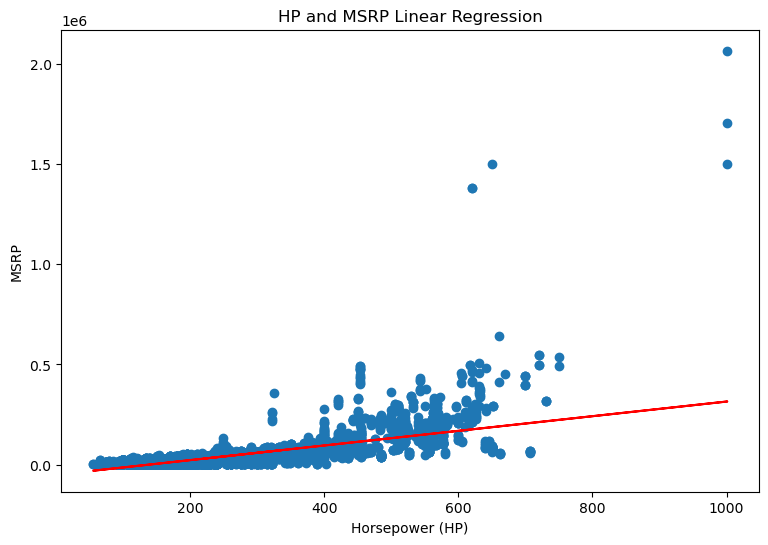

In [154]:
# Put Code Here
y = df['MSRP']
x = df['HP']
resulting_model = stats.linregress(x, y)
print("R-squared (R2) value:", resulting_model.rvalue ** 2)
plt.figure(figsize=(9, 6))
plt.plot(x, y, 'o')
plt.plot(x, resulting_model.intercept + resulting_model.slope * x, 'r', label='line')
plt.title('HP and MSRP Linear Regression')
plt.xlabel('Horsepower (HP)')
plt.ylabel('MSRP')
plt.show()

21. For __5 pts. of Extra Credit__, explore improving the linear regression model by removing the remaining outliers at the low end of
the `MSRP` range. Repeat the SciPy `linregress` and plotting from the previous step, which should result in a significantly improved R<sup>2</sup> value.

R-squared (R2) value: 0.4377730492822897


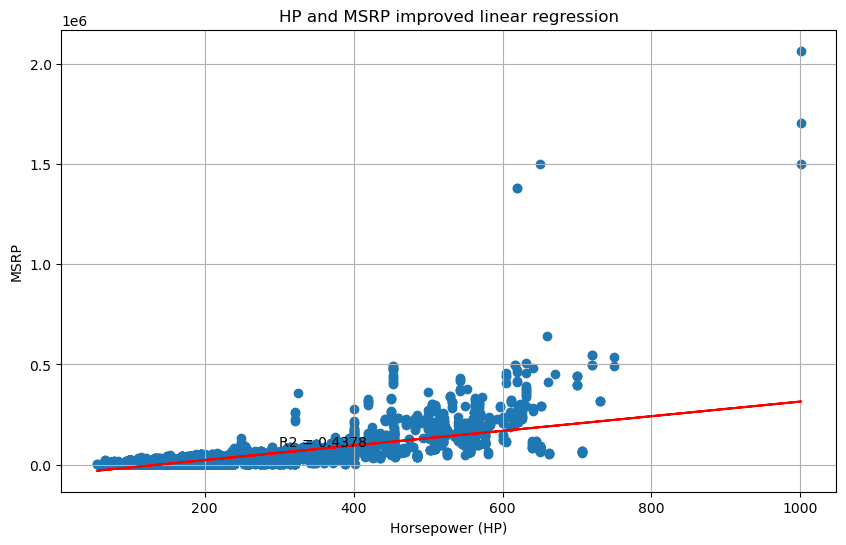

In [160]:
# Put Code Here
x = df['HP']
y = df['MSRP']
result_range = stats.linregress(x, y)
r_squared = result_range.rvalue ** 2
print("R-squared (R2) value:", r_squared)
plt.figure(figsize=(10, 6))
plt.scatter(x, y)
plt.plot(x, result_range.intercept + result_range.slope * x, 'r', label='Fitted line')
plt.title('HP and MSRP improved linear regression')
plt.xlabel('Horsepower (HP)')
plt.ylabel('MSRP')
plt.grid(True)
plt.text(300, 90000, f'R2 = {r_squared:.4f}', fontsize=10,)
plt.show()


Be sure to save and exit your Jupyter Notebook and Shutdown Jupyter Lab (from the __File__ menu) before you submit your notebook
on Blackboard for grading.